# Housing Prices - Advanced Regression Techniques

### Problem Description

The problem is trying to predict the final price of a residential home in Ames, Iowa. Let’s
say if we were to ask a client who’s in the market for a new house, “What are some key
features you would like?”, after getting those features we will be able to import this into
our application which will then give them an estimate of their new home. To actually
work this application out we will be using a dataset that includes 79 variables that are
describing different aspects of the properties. The challenge is to create an accurate
predictive model using advanced regression techniques like random forest and gradient
boosting. The competition encourages creative features to create new variables or
transform existing ones to improve the accuracy of the model. Our goal for this
challenge is to expand our skills in machine learning and get a better understanding of
the model’s accuracy.

### Dataset

The dataset used in the competition is composed of four files as it was shown in the
description. The data contains 79 features, including the target variable SalePrice,
which is the sale price of the property in dollars. As we were mentioning above, the
features that we ask the client would also be in here, most likely they are in the 79
variables that we are able to edit, however if they are not we are able to tweak these
variables or even add new ones which can further help this application. Some of the
features describe various characteristics of the properties such as; lot size, number of
bedrooms, type of roofing, and quality of material used in construction. The training set
contains 1460 instances, while the test set has 1459 instances.

In [2473]:
# import the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import style
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score  # compute some diagnostics
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [2474]:
# read in the data 
dt_train = pd.read_csv("Kaggle-Data/train.csv")
dt_test = pd.read_csv("Kaggle-Data/test.csv")

Now that we have the data loaded in, let's just make sure that it is accurate.

In [2475]:
dt_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2476]:
dt_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Let's now get some basic statistics about the dataset. This will only look at the numerical data in each of the datasets.

In [2477]:
dt_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2478]:
dt_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


After confirming that the testing and and training sets are read correctly, we have to do some data cleaning so that we don't have missing values and the such!

In [2479]:
# only take out the rows that do not have any data at all 
dt_train.dropna(axis = 0, how = 'all', inplace = True)
dt_test.dropna(axis = 0, how = 'all', inplace = True)

In [2480]:
print("Training Data shape ", dt_train.shape)
print("Testing Data shape ", dt_test.shape)

Training Data shape  (1460, 81)
Testing Data shape  (1459, 80)


We see that all of the rows have some type of data, so that means there are no rows with all NANs, which is a really good thing.
Now we need take out the columns that have all NANs! 

In [2481]:
# only take out the columns that do not have any data at all 
dt_train.dropna(axis = 1, how = 'all', inplace = True)
dt_test.dropna(axis = 1, how = 'all', inplace = True)

In [2482]:
print("Training Data shape ", dt_train.shape)
print("Testing Data shape ", dt_test.shape)

Training Data shape  (1460, 81)
Testing Data shape  (1459, 80)


Again, none of the columns also do not have all missing values. Now, we can look into how many null values there are in each, so that we can decide which variables are not needed in our machine learning!

In [2483]:
# check for null values
null_train = dt_train.columns[dt_train.isnull().any() == True]
dt_train[null_train].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [2484]:
# do the same thing for the testing dataset
null_test = dt_test.columns[dt_test.isnull().any() == True]
dt_test[null_test].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

From the table above, we see that there are a lot of missing values in the dataset, but since we are going to look at correlations, it does not matter much.

After confirming that the testing and and training sets are read correctly, it is almost time to look into the correlations between the `SalesPrice` and all of the other features in the dataset. We have to do this because the correlations will tell us which features actually have the highest likelyhood of determining the sales price correctly.

In [2485]:
# do all of the correlations
the_correlations = pd.DataFrame(dt_train.corr())

/var/folders/28/sqkn5wnn6q900rlhyn66rp5c0000gn/T/ipykernel_84254/1189920394.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  the_correlations = pd.DataFrame(dt_train.corr())


In [2486]:
# find the correlations regarding the target
sale_price = the_correlations.sort_values(by= "SalePrice", key=abs)
sale_price["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We have found the highest correlations with `SalesPrice`, which are the `OverallQual`, `GrLivArea`, `GarageCars`, `GarageArea`, and `TotalBsmtSF`. However, we decided to take out `GarageArea` because we thought it was similar to `GarageCars`. Instead, we decided to use `BedroomAbvGr` as a factor because it has a high correlation and it is something that is sought out when looking for a house realistically.

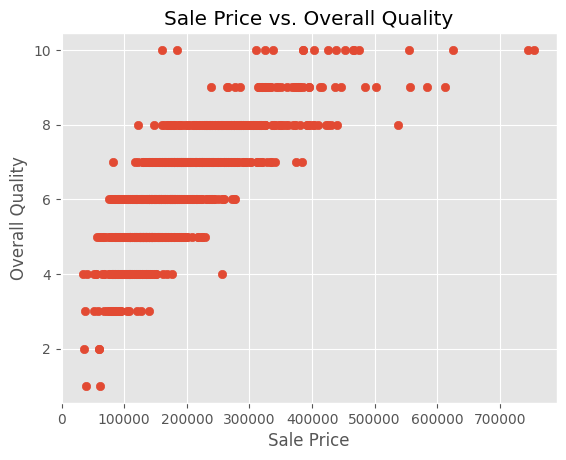

In [2487]:
# lets create some graphs with the first five highest correlations
plt.scatter(dt_train['SalePrice'], dt_train['OverallQual'])

plt.style.use('ggplot')
# create the labels
plt.xlabel("Sale Price") 
plt.ylabel("Overall Quality") 
plt.title("Sale Price vs. Overall Quality")
plt.show()

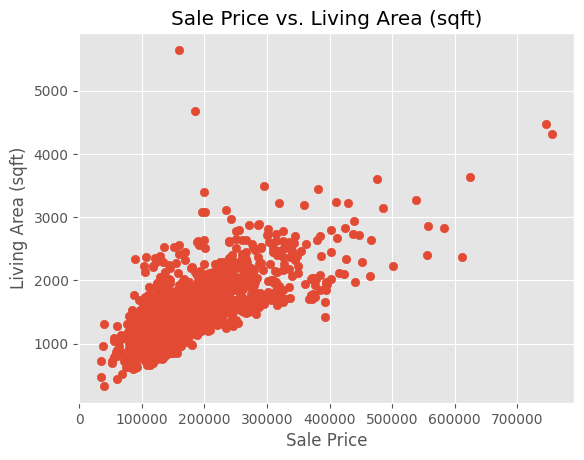

In [2488]:
plt.scatter(dt_train['SalePrice'], dt_train['GrLivArea'])

plt.style.use('ggplot')
# create the labels
plt.xlabel("Sale Price") 
plt.ylabel("Living Area (sqft)") 
plt.title("Sale Price vs. Living Area (sqft)")
plt.show()

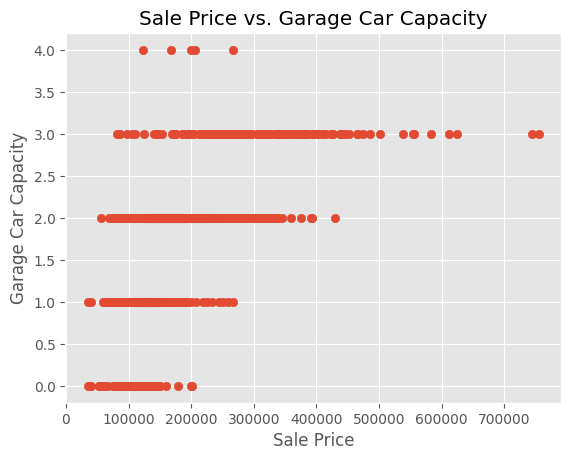

In [2489]:
plt.scatter(dt_train['SalePrice'], dt_train['GarageCars'])

plt.style.use('ggplot')
# create the labels
plt.xlabel("Sale Price") 
plt.ylabel("Garage Car Capacity") 
plt.title("Sale Price vs. Garage Car Capacity")
plt.show()

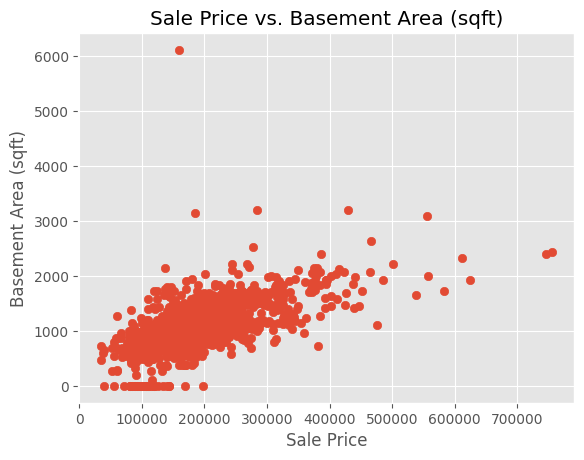

In [2490]:
plt.scatter(dt_train['SalePrice'], dt_train['TotalBsmtSF'])

plt.style.use('ggplot')
# create the labels
plt.xlabel("Sale Price") 
plt.ylabel("Basement Area (sqft)") 
plt.title("Sale Price vs. Basement Area (sqft)")
plt.show()

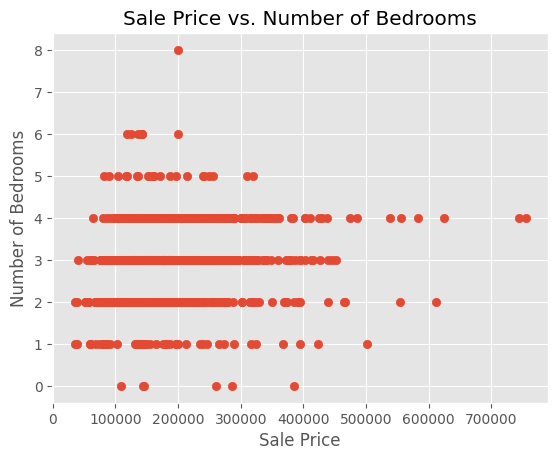

In [2491]:
plt.scatter(dt_train['SalePrice'], dt_train['BedroomAbvGr'])

plt.style.use('ggplot')
# create the labels
plt.xlabel("Sale Price") 
plt.ylabel("Number of Bedrooms") 
plt.title("Sale Price vs. Number of Bedrooms")
plt.show()

After finding the features that we think are important, let's now prepare the data and start doing some machine learning!

In [2492]:
# get the variables that we want to use 
X = np.array(dt_train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'BedroomAbvGr']])

# set the target variable
y = dt_train['SalePrice']

In [2493]:
# do the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [2494]:
# making sure that there is data
X_train

array([[   7, 1682,    2, 1304,    3],
       [   5, 1072,    2,  547,    2],
       [   7, 1547,    2,  756,    3],
       ...,
       [   5,  864,    2,  864,    2],
       [   7, 1426,    1,  912,    3],
       [   7, 1555,    3, 1373,    2]])

#### Random Forest

In [2495]:
# create the Random Forest Generator (default: 100 trees)
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

In [2496]:
# build the random forest
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [2497]:
# create the predictions and look at the shape
y_pred = random_forest.predict(X_test)
y_pred.shape

(438,)

In [2498]:
# these are the price predictions based on our model
y_pred

array([132401.5       , 316046.31      , 138495.        , 178759.        ,
       293673.95      ,  69878.        , 204003.78      , 154991.225     ,
        69878.        , 119032.18      , 167307.2       , 129893.38095238,
        87390.75      , 221470.        , 178615.        , 127163.        ,
       195325.        , 128456.5       , 126542.5       , 192519.        ,
       162423.        , 201549.64166667, 158618.41333333, 117414.        ,
       209450.6       , 159523.        , 184897.2       , 100886.58333333,
       190594.        , 190139.96      , 117488.        , 235001.5       ,
       177507.        , 107747.5       , 273902.78      , 136130.        ,
       159061.5       , 203811.35      , 306388.21      , 106778.75      ,
       140652.11904762, 230943.75      , 110939.        , 358462.09      ,
       145419.        , 181874.1       , 125409.41269841, 113718.        ,
       401354.91      , 141936.92      , 118429.5       , 183357.        ,
       115210.5       , 3

In [2499]:
# y_test 
y_test.shape

(438,)

In [2500]:
# find the mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

19390.313964616056

In [2501]:
# now lets do the root mean squared value
np.sqrt(mean_absolute_error(y_test, y_pred))

139.24910759001673

From this model, we see that our random forest learning method was not a good predictor of housing prices. This makes sense as we only used five components to predict the housing prices rather than all of them that are available.

## Now, let's do the Gradient Boosting!

In [2502]:
# issues with installing xgboost, so keep it here just in case
#!pip install xgboost


In [2503]:
import xgboost as xgb

# create the model (used 1000 estimators as xgboost requires more estimators for accurate results)
gradient_boost = xgb.XGBRegressor(n_estimators = 1000, max_depth = 5, learning_rate = 0.03)


In [2504]:
# fitting the model (using the same x_train and y_train)
gradient_boost.fit(X_train, y_train)

y_pred = gradient_boost.predict(X_test)

In [2505]:
print("PREDICTIONS ", y_pred.shape)
print("TEST ", y_test.shape)

PREDICTIONS  (438,)
TEST  (438,)


In [2506]:
# find the mean absolute error values
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("SQUARED MEAN ROOT ", np.sqrt(mean_absolute_error(y_test, y_pred)))

MEAN ABSOLUTE ERROR:  20710.820000356736
SQUARED MEAN ROOT  143.91254288753547


As it can be seen from the gradient boosting algorithm above, our results were not good. This once again makes sense as we are using only five components to predict the housing price.

After using only 5 components, we decided to add all the components except for the ones which are not giving much contribution to our program. We decided to do this because we were not satisfied with our results.

## More than 5 Components!

In [2507]:
# finding all of the null values in the training dataset
null_train = dt_train.columns[dt_train.isnull().any() == True]
len(null_train)


19

In [2508]:
# printing them out
null_train

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [2509]:
# count the number of nulls again
dt_train[null_train].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [2510]:
# From this, we decided to take out all of these features
# with too many null values from the dataset
for col in null_train:
    # if it is greater than 700 null values, we take out
    if dt_train[col].isnull().sum() > 700: 
        dt_train.drop(columns=col, inplace=True)
    # if it is a integer or a float
    elif dt_train[col].dtype == "int" or dt_train[col].dtype == "float64":
        # insert the mean instead
        dt_train[col] = dt_train[col].fillna(dt_train[col].mean())
    else: 
        continue


In [2511]:
# look at the shape
dt_train.shape

(1460, 77)

In [2512]:
# categorical columns
categorical_columns = [col for col in dt_train.columns if dt_train[col].dtype == "object"]
categorical_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [2513]:
# count the number of categorical variables
len(categorical_columns)

39

In [2514]:
# lets see all of the categorical variables
dt_train[categorical_columns]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


In [2515]:
# encode the data
from sklearn.preprocessing import LabelEncoder

# create the encoder
le = LabelEncoder()



# with the categorical columns do the transformation
for col in categorical_columns:
    dt_train[col + "encoded"] = le.fit_transform(dt_train[col])

# drop the original categorical columns
dt_train.drop(categorical_columns, axis = 1, inplace=True)

In [2516]:
# check out the categorical columns
dt_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQualencoded,Functionalencoded,FireplaceQuencoded,GarageTypeencoded,GarageFinishencoded,GarageQualencoded,GarageCondencoded,PavedDriveencoded,SaleTypeencoded,SaleConditionencoded
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2,6,5,1,1,4,4,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,3,6,4,1,1,4,4,2,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2,6,4,1,1,4,4,2,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,2,6,2,5,2,4,4,2,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,3,6,4,1,1,4,4,2,8,4
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,3,2,4,1,2,4,4,2,8,4
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,2,6,2,1,1,4,4,2,8,4
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,2,6,5,1,2,4,4,2,8,4


In [2517]:
# create new x with all of the variables besides SalePrice
X =  dt_train.loc[:, dt_train.columns != "SalePrice"]

# create the y-variable
y = dt_train['SalePrice']

In [2518]:
# do the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [2519]:
# create the Random Forest Generator (default: 100 trees)
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

In [2520]:
# build the random forest
random_forest.fit(X_train, y_train)

# create the predictions and look at the shape
y_pred = random_forest.predict(X_test)
y_pred.shape

# find the mean absolute error
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("SQUARED MEAN ROOT ", np.sqrt(mean_absolute_error(y_test, y_pred)))

MEAN ABSOLUTE ERROR:  16616.14358447489
SQUARED MEAN ROOT  128.9036213008575


# Now lets do gradient boosting

In [2521]:
import xgboost as xgb

# create the model (used 1000 estimators as xgboost requires more estimators for accurate results)
gradient_boost = xgb.XGBRegressor(n_estimators = 1000, max_depth = 5, learning_rate = 0.03)

In [2522]:
gradient_boost.fit(X_train, y_train)

y_pred = gradient_boost.predict(X_test)

In [2523]:
print("PREDICTIONS ", y_pred.shape)
print("TEST ", y_test.shape)

PREDICTIONS  (438,)
TEST  (438,)


In [2524]:
# find the mean values
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("SQUARED MEAN ROOT ", np.sqrt(mean_absolute_error(y_test, y_pred)))

MEAN ABSOLUTE ERROR:  15536.944920091324
SQUARED MEAN ROOT  124.64728204052956


# Decision Tree (for Fun)

In [2525]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

treePred= tree.predict(X_test)
print (treePred)

from sklearn.metrics import r2_score
def r_squared(y_true, y_pred):
    answer = r2_score(y_true=y_true, y_pred=y_pred)
    return answer


KNr2 = r_squared(y_test, treePred)
print ("KNeighborsRegressor R Sqrd = ", KNr2)

[147159.07638889 358039.52777778 147159.07638889 167659.11764706
 312389.68181818  92830.71428571 212132.7755102  167659.11764706
  92830.71428571 132033.484375   159523.15384615 121273.45731707
  92830.71428571 212132.7755102  174443.67948718 147159.07638889
 212132.7755102  147159.07638889 147159.07638889 182866.09090909
 174443.67948718 266569.17567568 174443.67948718 121273.45731707
 182866.09090909 147159.07638889 182866.09090909  92830.71428571
 174443.67948718 182866.09090909 121273.45731707 240189.0625
 167659.11764706  92830.71428571 266569.17567568 147159.07638889
 132033.484375   212132.7755102  266569.17567568 121273.45731707
 121273.45731707 240189.0625     121273.45731707 358039.52777778
 147159.07638889 132033.484375   121273.45731707 121273.45731707
 358039.52777778 132033.484375   121273.45731707 208470.
 121273.45731707 266569.17567568 121273.45731707 212132.7755102
 212132.7755102  147159.07638889 147159.07638889 121273.45731707
  92830.71428571 147159.07638889 35803

In [2526]:
# find the mean values
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, treePred))
print("SQUARED MEAN ROOT ", np.sqrt(mean_absolute_error(y_test, treePred)))

MEAN ABSOLUTE ERROR:  26891.415512546322
SQUARED MEAN ROOT  163.98602230844654


# Lasso (FOR FUN PT.2)

In [2527]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

Lasso_reg = Lasso()
params = {'alpha': [x for x in [0.0001, 0.001, 0.09]]}

Lasso_reg = GridSearchCV(Lasso_reg, param_grid=params)
Lasso_reg.fit(X_train, y_train)
print("BEST Params ", Lasso_reg.best_params_,  " BEST SCORE " , Lasso_reg.best_score_)

BEST Params  {'alpha': 0.09}  BEST SCORE  0.7204454570018505


In [2528]:
Lasso_reg = Lasso(alpha=0.09)
Lasso_reg.fit(X_train, y_train)

y_pred_test = Lasso_reg.predict(X_test)

# find the mean values
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred_test))
print("SQUARED MEAN ROOT ", np.sqrt(mean_absolute_error(y_test, y_pred_test)))

MEAN ABSOLUTE ERROR:  21860.612835639
SQUARED MEAN ROOT  147.85334908495986


After doing the fun ones as well as gradient boosting and random tree forest, we decided to go with gradient boosting as our final one.  Gradient Boosting will be used on the testing data that was given to us by Kaggle.

# Final Testing (Gradient Boosting)

In [2529]:
# From this, we decided to take out all of these features from the dataset so that we can have a better understanding of the data
for col in null_train:
    # we keep this so that we can run the data on our training data
    if col == "FireplaceQu":
        continue
    if dt_test[col].isnull().sum() > 700: 
        dt_test.drop(columns=col, inplace=True)
    # if it is a integer or a float
    elif dt_test[col].dtype == "int" or dt_test[col].dtype == "float64":
        dt_test[col] = dt_test[col].fillna(dt_test[col].median())
    else: 
        continue

In [2530]:
# encode the data again
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# find teh new categrocial variables
categorical_columns = [col for col in dt_test.columns if dt_test[col].dtype == "object"]

# categorical columns encoding 
for col in categorical_columns:
    dt_test[col + "encoded"] = le.fit_transform(dt_test[col])

# drop the old ones 
dt_test.drop(categorical_columns, axis = 1, inplace=True)

dt_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQualencoded,Functionalencoded,FireplaceQuencoded,GarageTypeencoded,GarageFinishencoded,GarageQualencoded,GarageCondencoded,PavedDriveencoded,SaleTypeencoded,SaleConditionencoded
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,3,6,5,1,2,3,4,2,8,4
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,2,6,5,1,2,3,4,2,8,4
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,3,6,4,1,0,3,4,2,8,4
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,2,6,2,1,0,3,4,2,8,4
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,2,6,5,1,1,3,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,3,6,5,6,3,4,5,2,8,4
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,3,6,5,4,2,3,4,2,8,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,3,6,4,5,2,3,4,2,8,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,3,6,5,6,3,4,5,2,8,4


In [2531]:
# predict the variables
y_pred = gradient_boost.predict(dt_test)

# create the outputs
output = pd.DataFrame({'Id': dt_test['Id'], 'SalePrice': y_pred})

# put it into a csv
output.to_csv("gradient_boost_pred.csv", index = False)

In [2532]:
# predict the variables
y_pred = gradient_boost.predict(dt_test)

# create the outputs
output = pd.DataFrame({'Id': dt_test['Id'], 'SalePrice': y_pred})

# put it into a csv
output.to_csv("gradient_boost_pred.csv", index = False)

This completes this Project, the output is in a file called "gradient_boost_pred" located in the same folder as this file. Submit it to kaggle to see the score.
